<a href="https://colab.research.google.com/github/n-aguiar/Data_Science/blob/main/Natalia_Aguiar-Lab%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

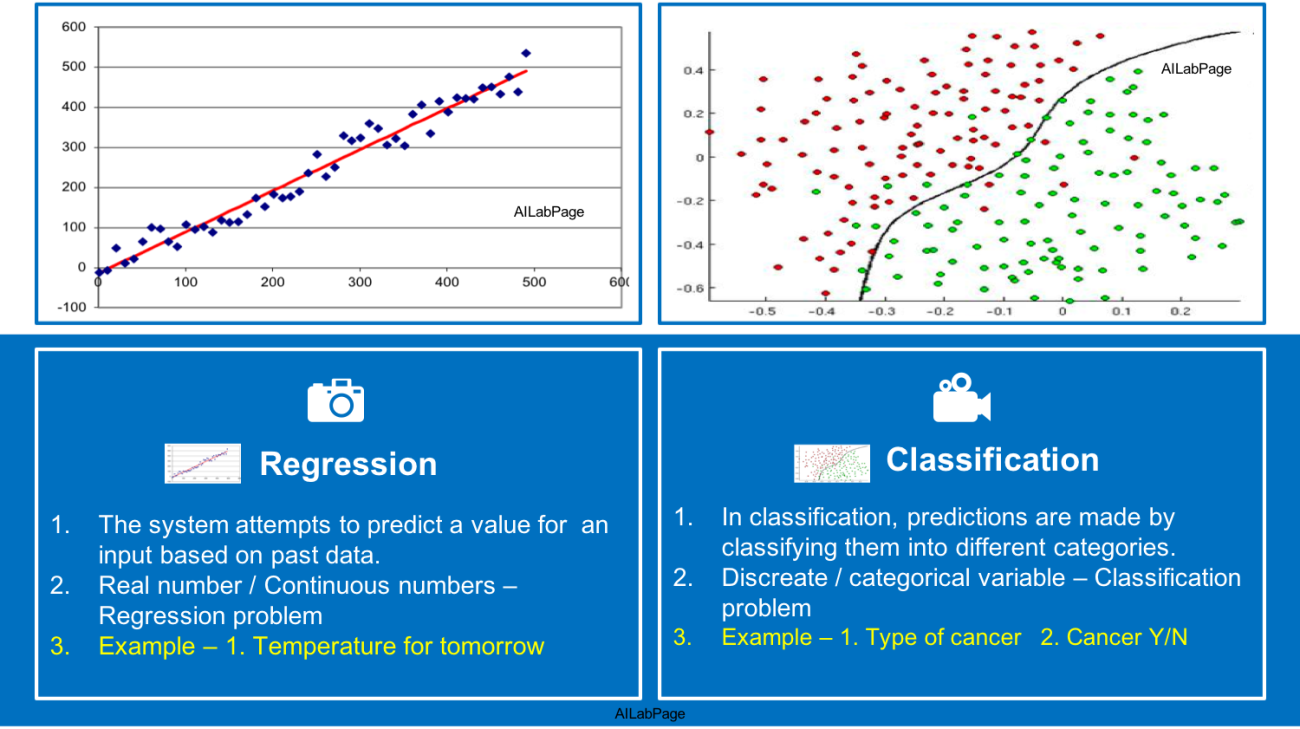

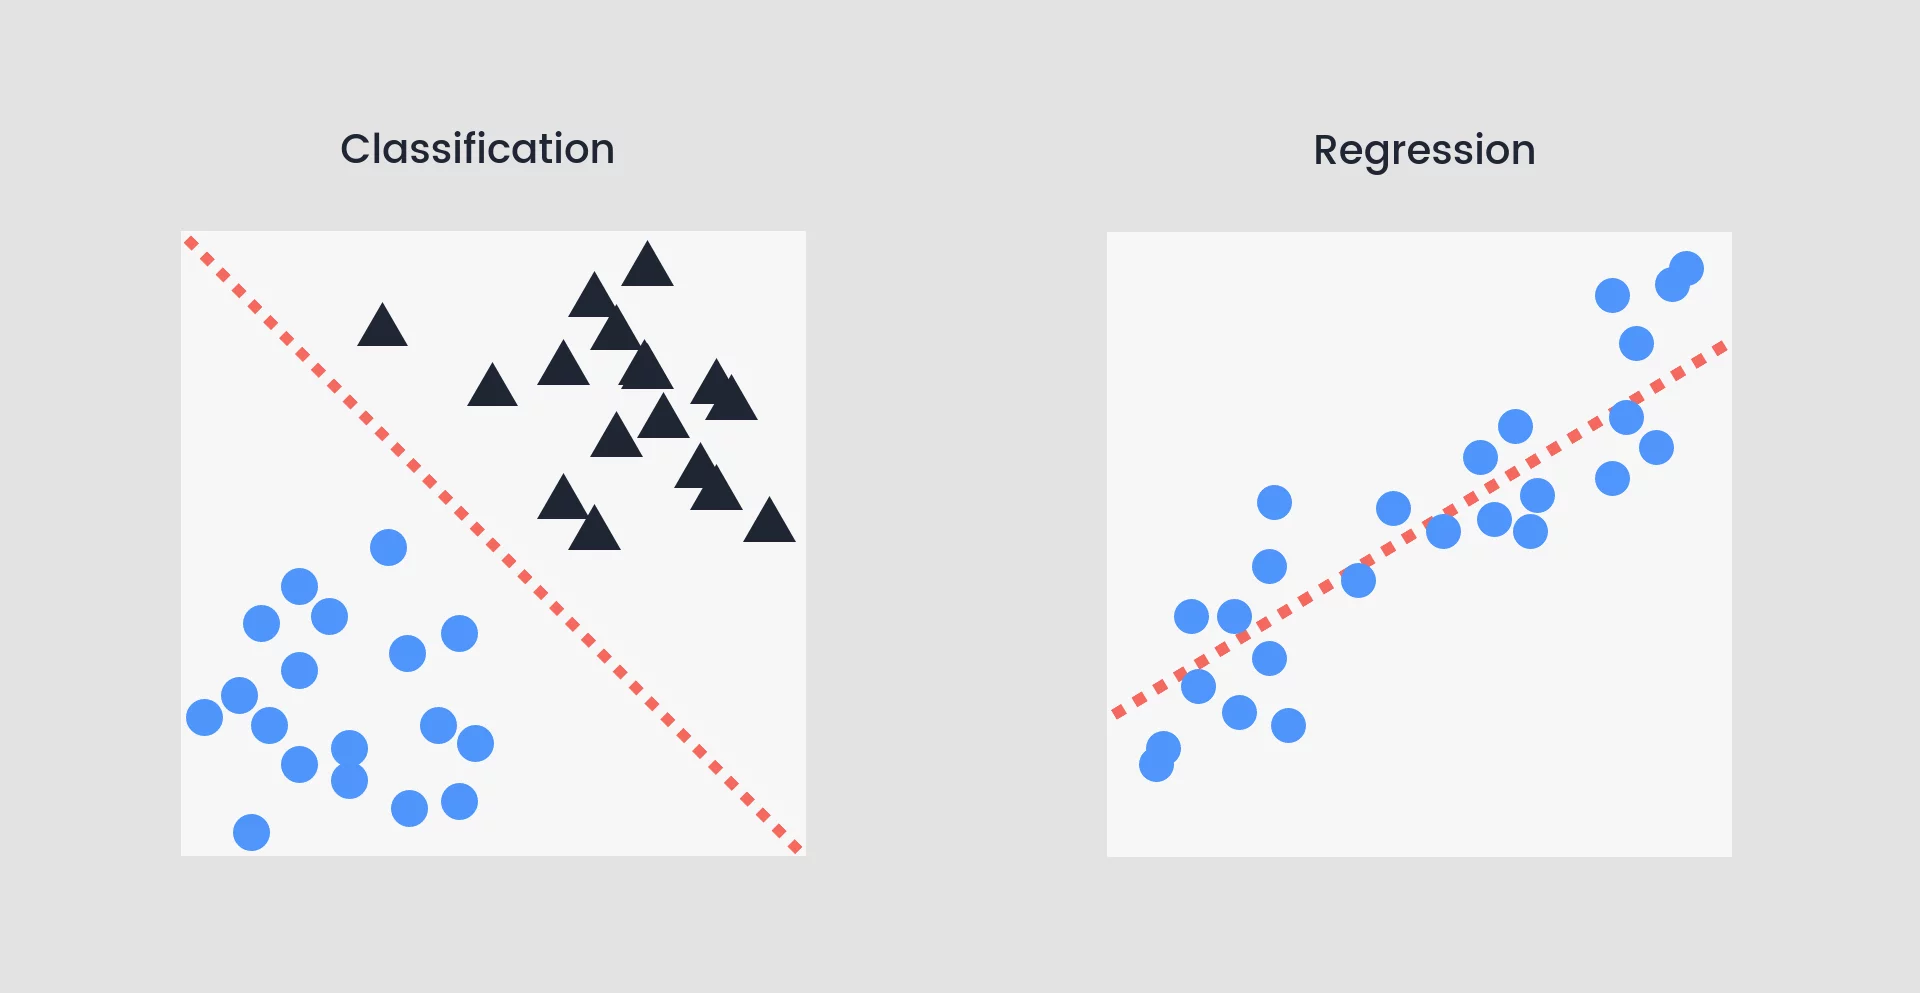

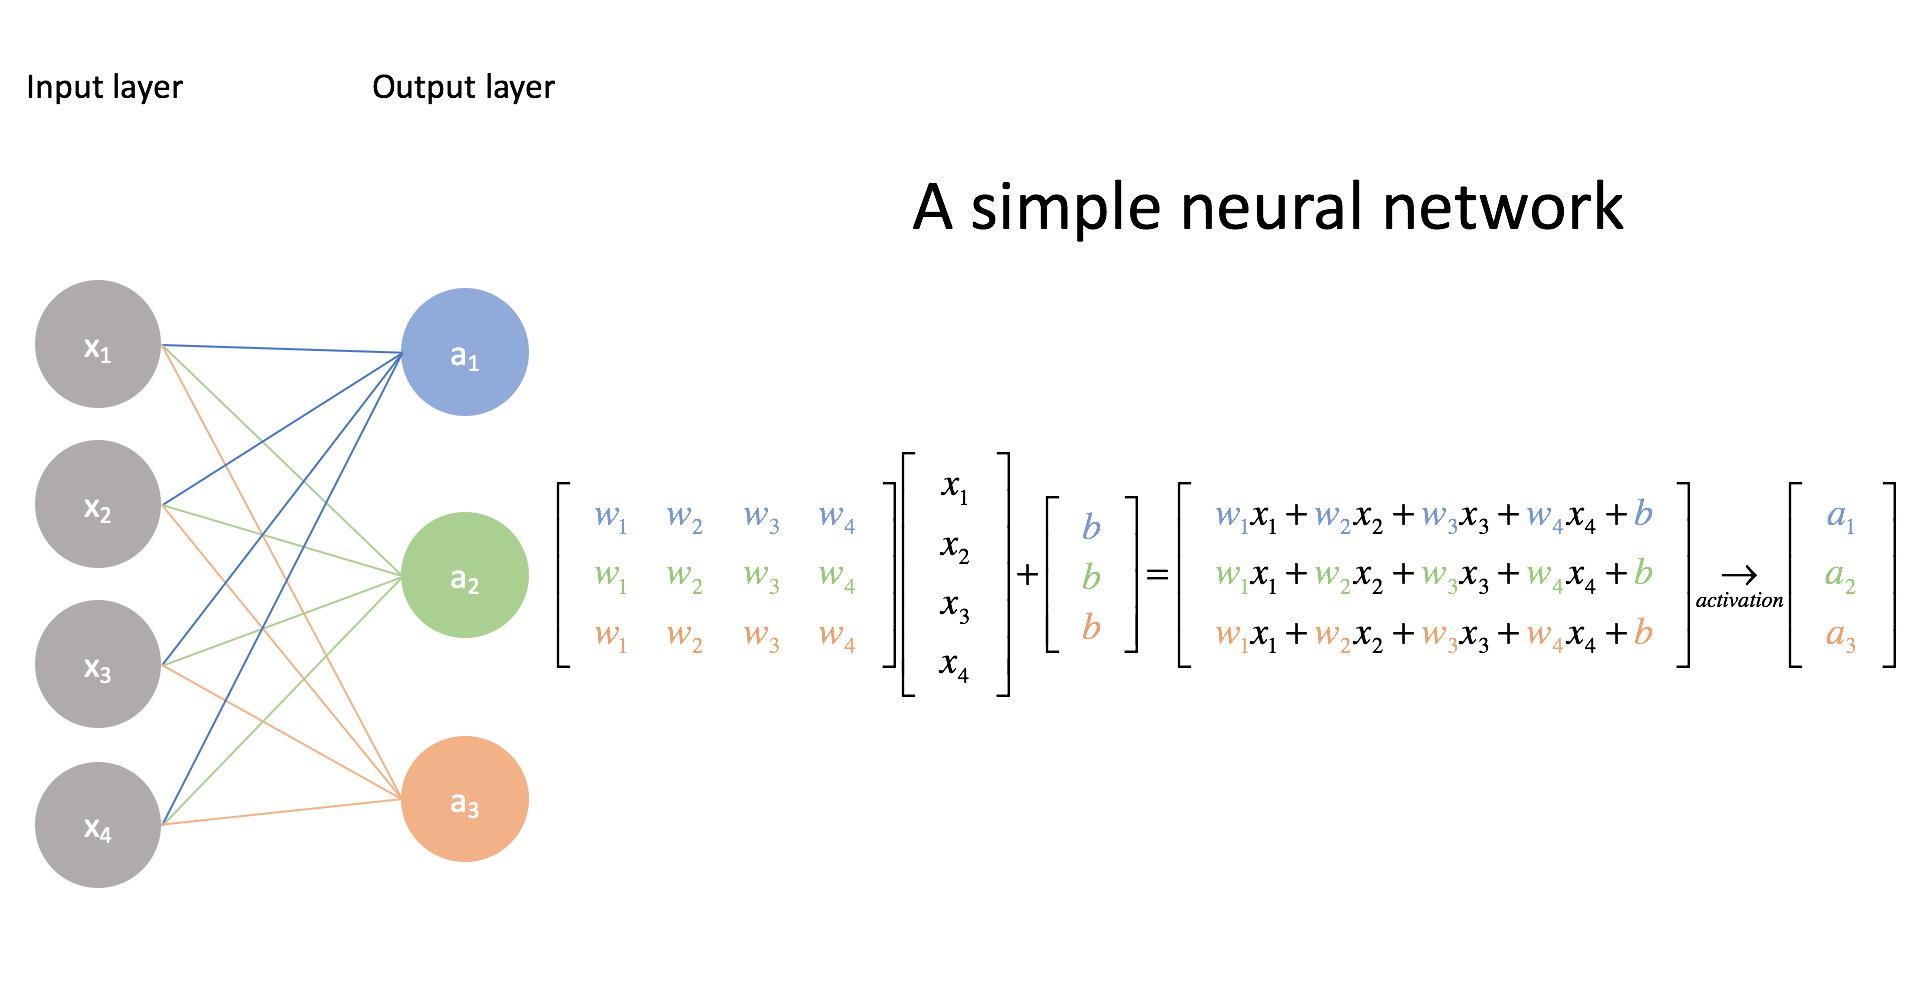

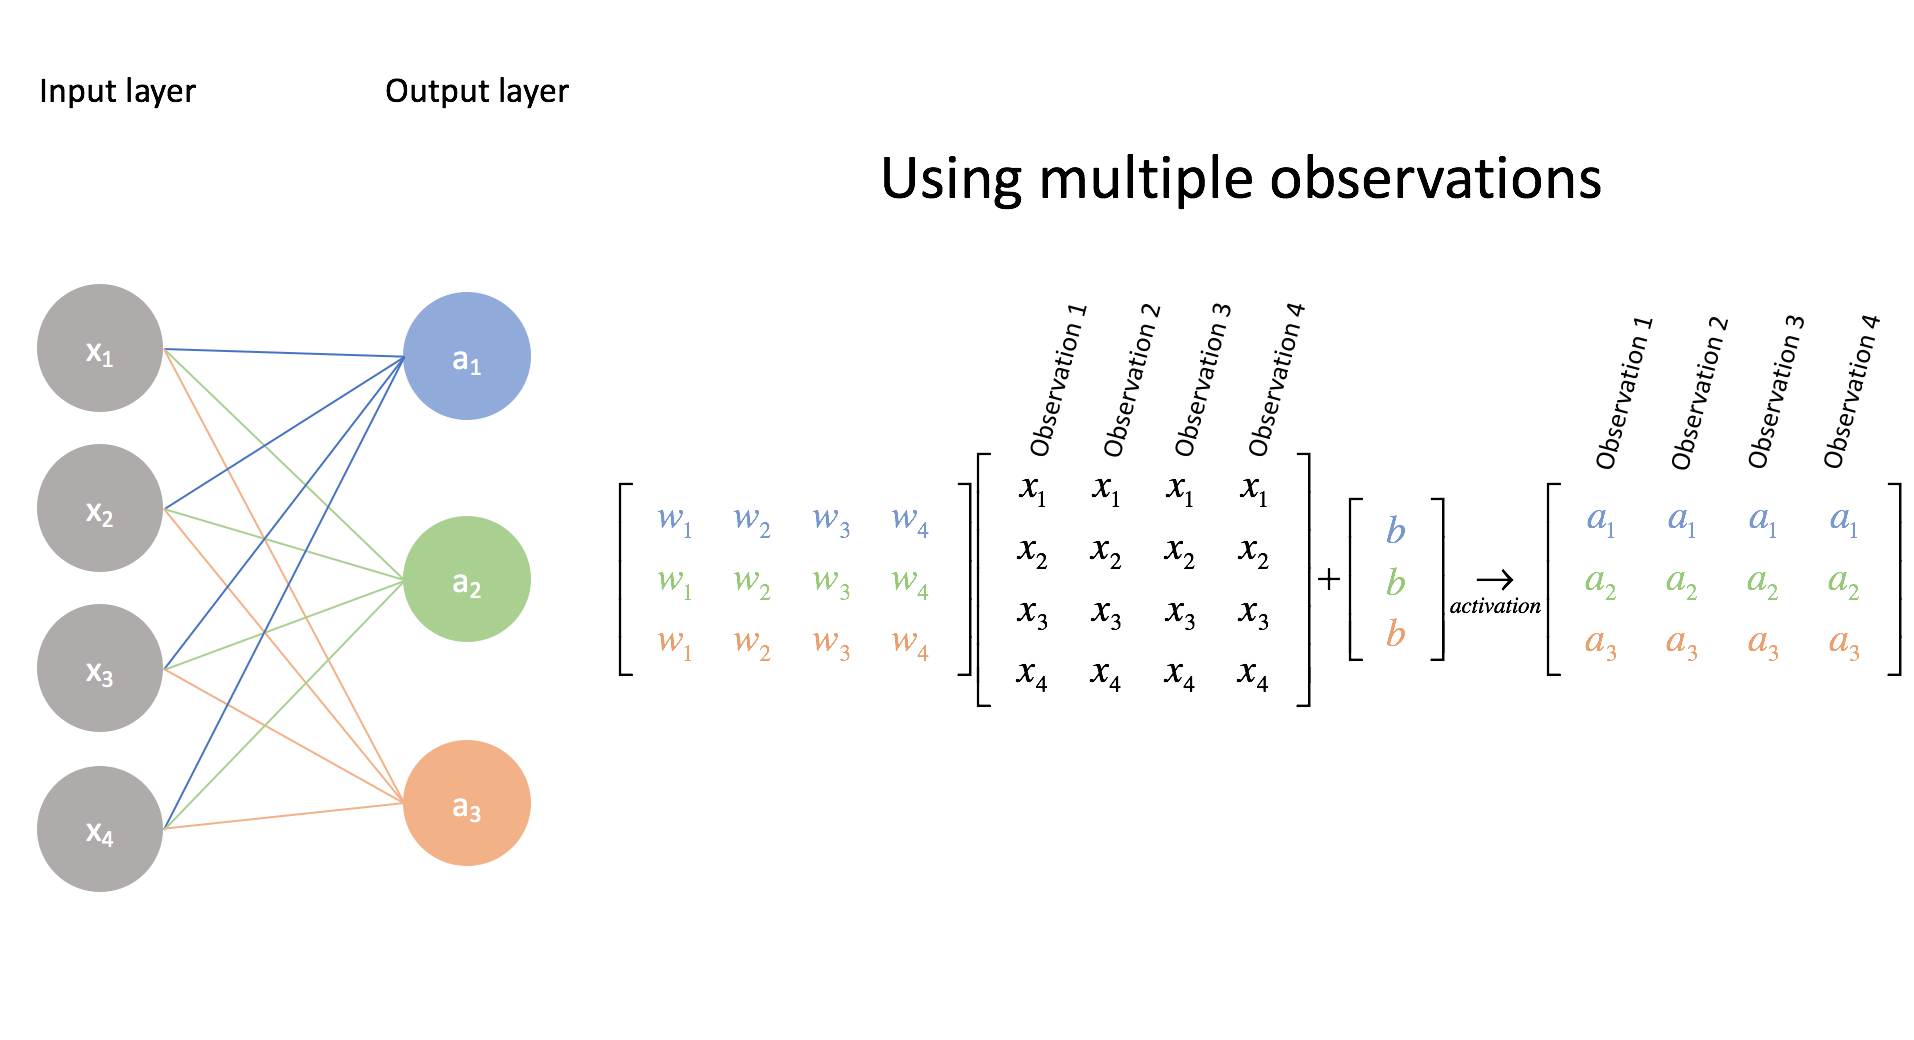

# Libraries

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr #importing libraries and programs
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-iu1uemw_
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-iu1uemw_


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [2]:
def plot(x): #defining the variable that imports the images later
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') #color
    ax.axis('off')
    fig.set_size_inches(10, 10) #size
    plt.show() #displays

In [3]:
def montage_plot(x): #puts all the images together, rather than one by one
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [4]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [5]:
##MNIST.  #numbers template
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST #Kanji template
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST #clothes template
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [6]:
X = train_set.data.numpy() #shortcuts for future code
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255 

In [7]:
X.shape #shapes the values from the numpy arrange

(60000, 1, 28, 28)

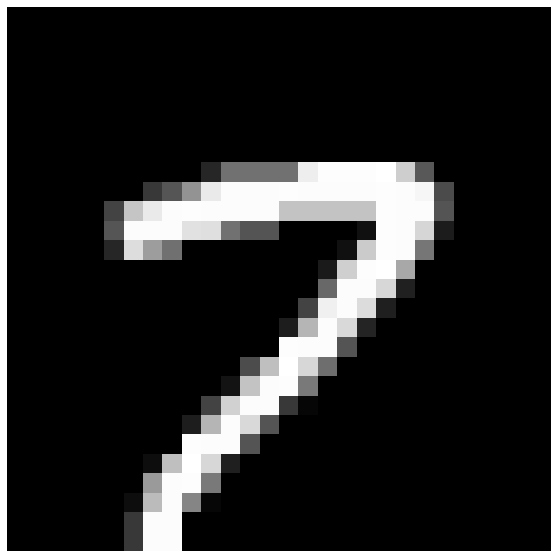

In [8]:
plot(X[123,0,0:28,0:28]) #plots the section from the "template"

In [9]:
Y[123] 

7

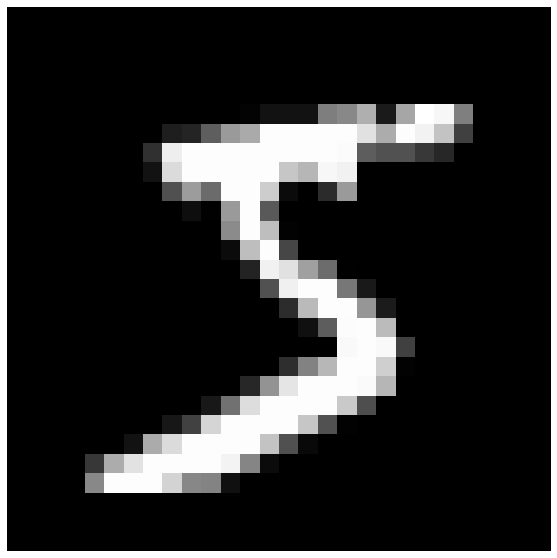

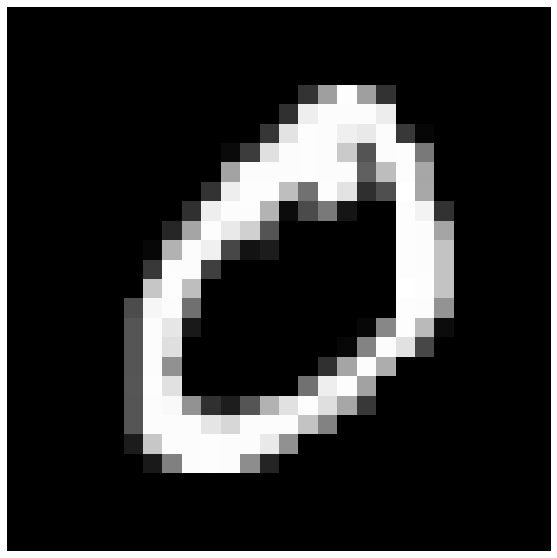

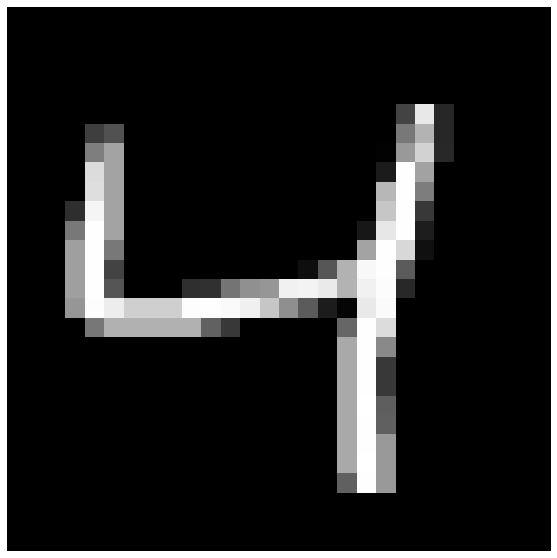

In [10]:
for i in range(3): #plots the sections in the range
    plot(X[i,0,:,:])

In [11]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [12]:
X[0:25,0,:,:].shape

(25, 28, 28)

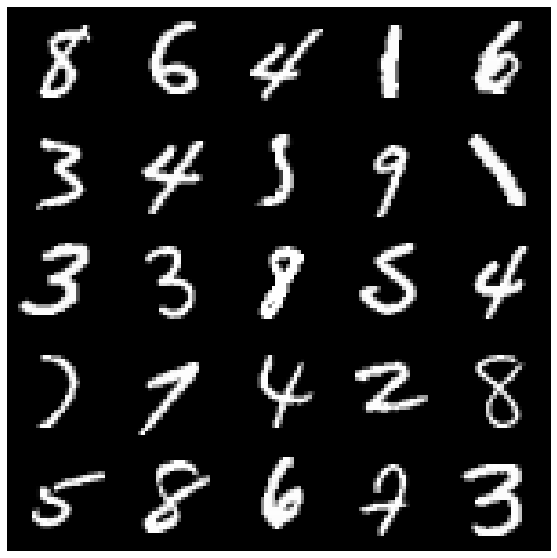

In [13]:
montage_plot(X[125:150,0,:,:]) #puts everything together in a montage

In [14]:
X.shape[0] #Shapes values at 0

60000

In [15]:
X_test.shape

(10000, 1, 28, 28)

In [16]:
X.shape[0]

60000

In [17]:
X_test.shape[0] 

10000

In [18]:
28*28 #area of the montage 

784

In [19]:
X = X.reshape(X.shape[0],784) #reshaping the total area of the montage rather than the strip 
X_test = X_test.reshape(X_test.shape[0],784)

In [20]:
X.shape,X_test.shape #new shape

((60000, 784), (10000, 784))

In [21]:
X[0] #colors of the boxes 0=black - 1=white

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

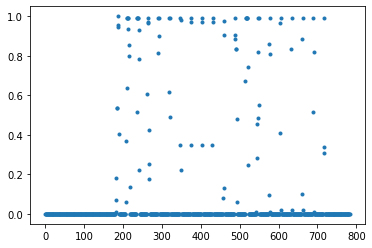

In [22]:
plt.plot(X[100],'.') #plotting

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

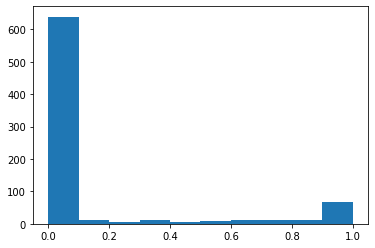

In [23]:
plt.hist(X[0]) #histogram

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [25]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  #inserting a url
wget.download(url,"W.data")

'W (5).data'

In [26]:
W = torch.load("W.data") #remembers the data

In [27]:
W.shape #shapes the new data from the url

torch.Size([784, 10])

In [28]:
X.shape

torch.Size([60000, 784])

In [29]:
def plot(x): #plots images
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100) #10 by 100 rather than a montage
    plt.show() #shows it

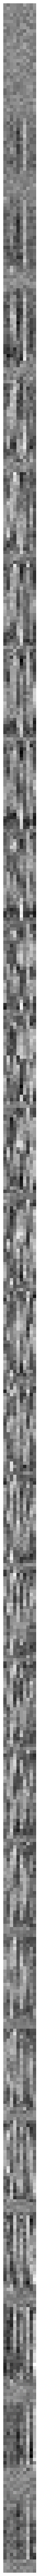

In [30]:
plot(W[0:784,:10])

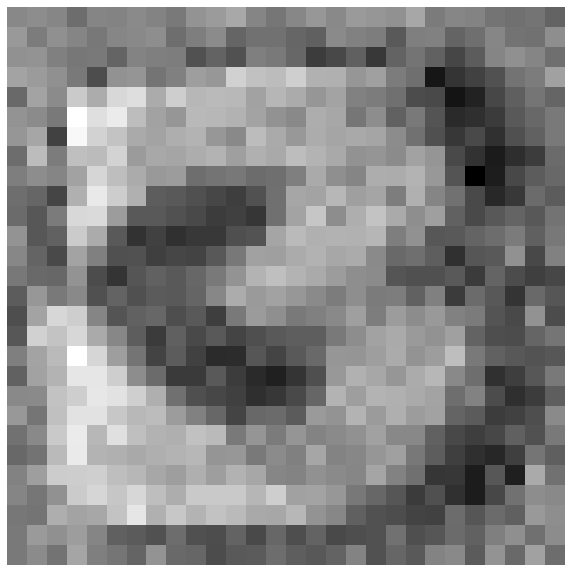

In [31]:
plot(W[:,3].reshape(28,28)) #displays the number tempalte according to the integer put in to the bracket

In [32]:
X.shape

torch.Size([60000, 784])

In [33]:
b = 40 

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [34]:
x,y = get_batch('train')

In [35]:
x.shape

torch.Size([40, 784])

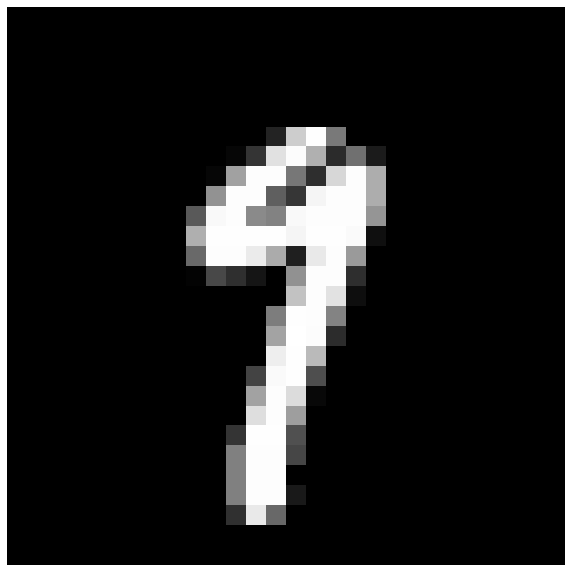

In [36]:
plot(x[0].reshape(28,28)) #displaying kanji character at the integer

In [37]:
y

tensor([9., 0., 8., 1., 2., 2., 0., 3., 9., 4., 8., 5., 0., 6., 0., 7., 1., 8.,
        5., 5., 7., 7., 7., 0., 1., 8., 5., 4., 6., 0., 1., 2., 8., 1., 8., 0.,
        7., 2., 1., 8.], device='cuda:0')

In [38]:
x.shape, W.shape #both shapes of the x and W values

(torch.Size([40, 784]), torch.Size([784, 10]))

In [39]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [40]:
(x@W).shape

torch.Size([40, 10])

In [41]:
y = x@W #intilizing new variable

In [42]:
y.shape

torch.Size([40, 10])

In [43]:
y #displaying all the x@W values

tensor([[ -4.0067,   1.9112,  -4.9641,  -1.1253,  -1.7508,  -0.5842,  -3.9177,
           6.2409,   2.9718,   3.2087],
        [ 15.0183, -19.8152,  -4.7339,  -7.8439, -13.3328,   0.7627,  -2.9801,
          -3.8433,   4.1457,  -8.2390],
        [  3.6488,  -5.4813,  -0.9602,  -8.1776,   3.0849,   4.1254,  -0.5788,
          -6.3871,  10.7658,   1.1753],
        [ -5.9481,   6.1560,   0.1101,  -1.3887,  -0.3124,   3.0090,   3.3891,
          -5.5410,   4.6332,  -1.3560],
        [ -0.1317, -11.2331,  10.0550,   0.0406,   0.5571,  -2.4353,   4.3027,
          -9.3607,   2.6771,  -0.9790],
        [ -5.8179, -11.3145,  20.2328,  -1.4422, -10.7315, -10.3341,  -2.6863,
          -4.1539,  -5.2631, -10.8517],
        [ 13.4731, -23.5206,  -8.4775,  -7.3011, -13.4541,   4.0766,   0.2324,
          -4.5700,   9.2887,  -9.1975],
        [ -5.2289, -15.9641,  -8.6456,  10.9519,  -0.6471,   3.2040,  -5.3550,
           0.8680,   0.3966,  -9.9717],
        [ -2.6082,  -4.9449,  -2.5249,   1.5151,

In [44]:
torch.argmax(y,1)

tensor([7, 0, 8, 1, 2, 2, 0, 3, 9, 4, 8, 5, 0, 6, 0, 7, 1, 8, 5, 6, 7, 7, 7, 0,
        1, 8, 5, 4, 6, 0, 1, 6, 8, 1, 5, 0, 7, 2, 1, 8], device='cuda:0')

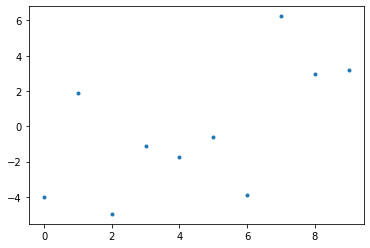

In [45]:
plt.plot(y[0].cpu().detach().numpy().T,'.') #plotting agaaainn to show the values

https://eleif.net/clicktimer.html

In [46]:
x@W #displaying the values

tensor([[ -4.0067,   1.9112,  -4.9641,  -1.1253,  -1.7508,  -0.5842,  -3.9177,
           6.2409,   2.9718,   3.2087],
        [ 15.0183, -19.8152,  -4.7339,  -7.8439, -13.3328,   0.7627,  -2.9801,
          -3.8433,   4.1457,  -8.2390],
        [  3.6488,  -5.4813,  -0.9602,  -8.1776,   3.0849,   4.1254,  -0.5788,
          -6.3871,  10.7658,   1.1753],
        [ -5.9481,   6.1560,   0.1101,  -1.3887,  -0.3124,   3.0090,   3.3891,
          -5.5410,   4.6332,  -1.3560],
        [ -0.1317, -11.2331,  10.0550,   0.0406,   0.5571,  -2.4353,   4.3027,
          -9.3607,   2.6771,  -0.9790],
        [ -5.8179, -11.3145,  20.2328,  -1.4422, -10.7315, -10.3341,  -2.6863,
          -4.1539,  -5.2631, -10.8517],
        [ 13.4731, -23.5206,  -8.4775,  -7.3011, -13.4541,   4.0766,   0.2324,
          -4.5700,   9.2887,  -9.1975],
        [ -5.2289, -15.9641,  -8.6456,  10.9519,  -0.6471,   3.2040,  -5.3550,
           0.8680,   0.3966,  -9.9717],
        [ -2.6082,  -4.9449,  -2.5249,   1.5151,

In [47]:
y2 = x@W 

In [48]:
y2.shape

torch.Size([40, 10])

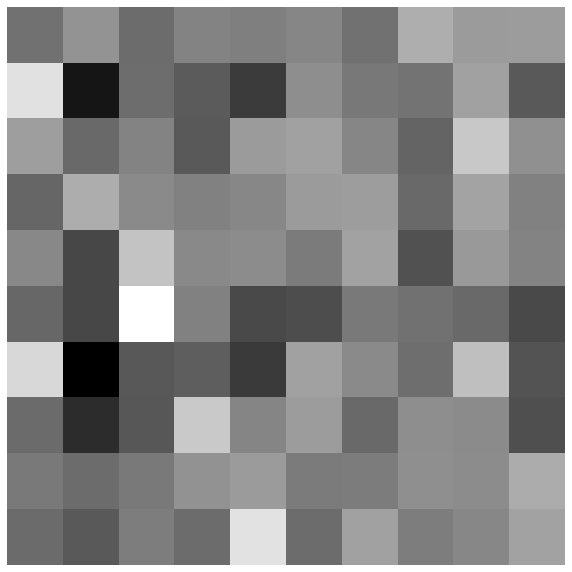

In [49]:
plot(y2[0:10,:]) #plots the section

In [50]:
y #displays the new y values

tensor([[ -4.0067,   1.9112,  -4.9641,  -1.1253,  -1.7508,  -0.5842,  -3.9177,
           6.2409,   2.9718,   3.2087],
        [ 15.0183, -19.8152,  -4.7339,  -7.8439, -13.3328,   0.7627,  -2.9801,
          -3.8433,   4.1457,  -8.2390],
        [  3.6488,  -5.4813,  -0.9602,  -8.1776,   3.0849,   4.1254,  -0.5788,
          -6.3871,  10.7658,   1.1753],
        [ -5.9481,   6.1560,   0.1101,  -1.3887,  -0.3124,   3.0090,   3.3891,
          -5.5410,   4.6332,  -1.3560],
        [ -0.1317, -11.2331,  10.0550,   0.0406,   0.5571,  -2.4353,   4.3027,
          -9.3607,   2.6771,  -0.9790],
        [ -5.8179, -11.3145,  20.2328,  -1.4422, -10.7315, -10.3341,  -2.6863,
          -4.1539,  -5.2631, -10.8517],
        [ 13.4731, -23.5206,  -8.4775,  -7.3011, -13.4541,   4.0766,   0.2324,
          -4.5700,   9.2887,  -9.1975],
        [ -5.2289, -15.9641,  -8.6456,  10.9519,  -0.6471,   3.2040,  -5.3550,
           0.8680,   0.3966,  -9.9717],
        [ -2.6082,  -4.9449,  -2.5249,   1.5151,

In [51]:
one_hot(y) #the "scantron answer" values

/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


ValueError: ignored

In [52]:
plot(one_hot(y)) #list of "answers"

ValueError: ignored

In [ ]:
plot(one_hot(torch.argmax(y2,1))) # section of the "scantron"

In [54]:
y

tensor([[ -4.0067,   1.9112,  -4.9641,  -1.1253,  -1.7508,  -0.5842,  -3.9177,
           6.2409,   2.9718,   3.2087],
        [ 15.0183, -19.8152,  -4.7339,  -7.8439, -13.3328,   0.7627,  -2.9801,
          -3.8433,   4.1457,  -8.2390],
        [  3.6488,  -5.4813,  -0.9602,  -8.1776,   3.0849,   4.1254,  -0.5788,
          -6.3871,  10.7658,   1.1753],
        [ -5.9481,   6.1560,   0.1101,  -1.3887,  -0.3124,   3.0090,   3.3891,
          -5.5410,   4.6332,  -1.3560],
        [ -0.1317, -11.2331,  10.0550,   0.0406,   0.5571,  -2.4353,   4.3027,
          -9.3607,   2.6771,  -0.9790],
        [ -5.8179, -11.3145,  20.2328,  -1.4422, -10.7315, -10.3341,  -2.6863,
          -4.1539,  -5.2631, -10.8517],
        [ 13.4731, -23.5206,  -8.4775,  -7.3011, -13.4541,   4.0766,   0.2324,
          -4.5700,   9.2887,  -9.1975],
        [ -5.2289, -15.9641,  -8.6456,  10.9519,  -0.6471,   3.2040,  -5.3550,
           0.8680,   0.3966,  -9.9717],
        [ -2.6082,  -4.9449,  -2.5249,   1.5151,

In [55]:
torch.argmax(y2,1) #maximum values

tensor([7, 0, 8, 1, 2, 2, 0, 3, 9, 4, 8, 5, 0, 6, 0, 7, 1, 8, 5, 6, 7, 7, 7, 0,
        1, 8, 5, 4, 6, 0, 1, 6, 8, 1, 5, 0, 7, 2, 1, 8], device='cuda:0')

In [56]:
b

40

In [57]:
torch.sum(y == torch.argmax(y2,1))/b #sum of all the maximums divided by the b from above

RuntimeError: ignored

In [59]:
X.shape

torch.Size([60000, 784])

runtime of the code

In [60]:
%%timeit
X[20000]@W

26.9 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [61]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [62]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [63]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [64]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [65]:
W.shape

torch.Size([784, 10])

In [66]:
W[:,0].shape

torch.Size([784])

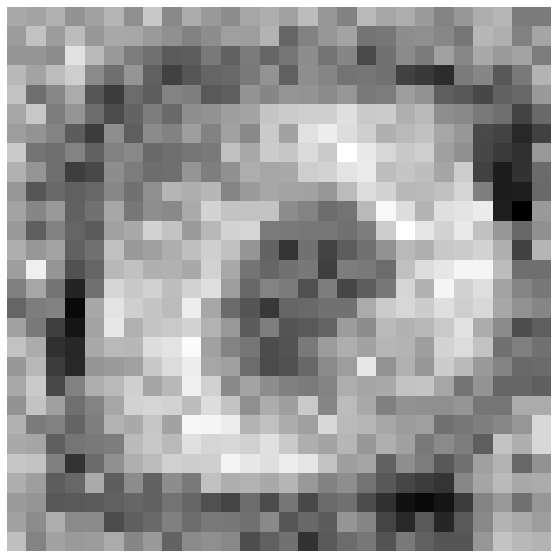

In [132]:
plot(W[:,0].reshape(28,28)) #plots the item in the section

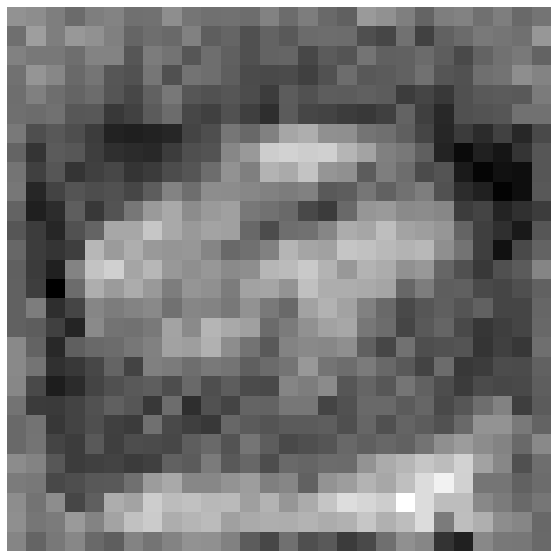

In [133]:
plot(W[:,9].reshape(28,28)) #plots the item in the section

In [134]:
W.shape #shapes the data

torch.Size([784, 10])

In [70]:
(W.T).shape

torch.Size([10, 784])

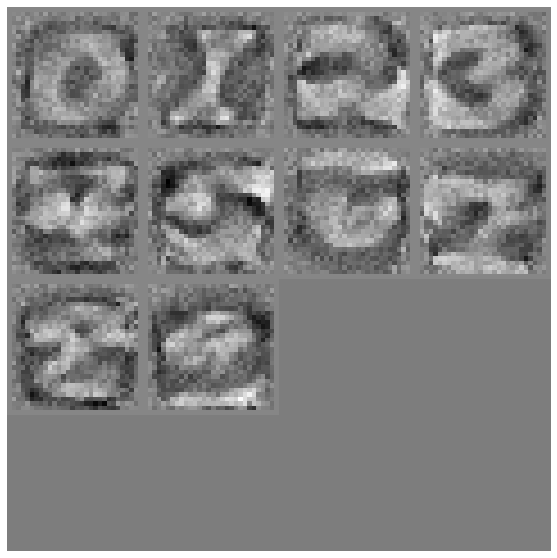

In [135]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy()) #puts the images into a template rather than a string of images or "scantron"

In [72]:
###################################################

In [136]:
def softmax(x): #defining terms
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [137]:
def cross_entropy(outputs, labels): #defining terms           
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [138]:
def Truncated_Normal(size): #defining terms

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [139]:
def acc(out,y): #defining terms
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [140]:
X.shape #shaping values of the montage

torch.Size([6000, 784])

In [141]:
def get_batch(mode): #defining code to get the data from the data training
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [142]:
def model(x,w):

    return x@w[0]

In [144]:
def make_plots(): #makes the plots for both training and test
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [81]:
wb.init(project="Simple_Linear_Adam_KMNIST"); #labels the folder that the test/train data will go into
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y) #this part will keep runinng over and over to get most up to date attempt

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: n-aguiar. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#Generator

In [145]:
#another example to test the code

In [146]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [147]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [149]:
def plot(x): #defines the code to make the plot
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10) #plot size
    plt.show() #actually displays the plot

In [151]:
batch_size = 512 #setting batch size

In [152]:
# #MNIST #numbers
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST #kanji
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST #clothes
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

Defining all the codes will be used later all together

In [87]:
X = train_set.data.numpy() 
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [88]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [153]:
X.shape,Y.shape,X_test.shape,Y_test.shape #shapes of all the values

(torch.Size([6000, 784]),
 torch.Size([60000]),
 torch.Size([1000, 784]),
 torch.Size([10000]))

In [90]:
###################################################

In [91]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [92]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [93]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [154]:
def get_batch(mode): #code for the training
    b = batch_size
    if mode == "train": #for the code to learn
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test": #how the code actually does in the tests
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [156]:
x,y = get_batch('train') #shortcut

IndexError: ignored

(array([526.,  16.,  19.,  16.,  35.,  67.,  49.,  38.,  16.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

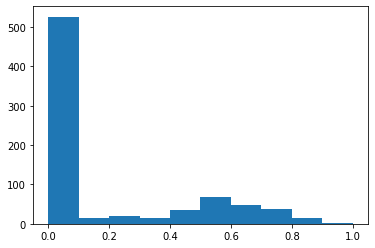

In [157]:
plt.hist(x.flatten().cpu().numpy()) #displays the histogram

In [159]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy()) #monntage of all the items from the image string above

IndexError: ignored

In [162]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)
#model training
def get_batch(mode):
    b = batch_size
    if mode == "train": #learning 
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test": #put to the test
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [161]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #creating variable

In [100]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [101]:
def Encoder(x,w): 
    return x@w[0]

In [102]:
def Decoder(x,w):
    return x@(w[0].T)

In [103]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [104]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [163]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item()) #prints the losses of the model

0.4099847376346588
0.004291574936360121
0.003315903712064028
0.003203519620001316
0.003515620483085513
0.003210530150681734
0.0034090911503881216
0.004131777677685022
0.0034178069327026606
0.003583356738090515


In [106]:
# batch_size = 16

In [107]:
x,y = get_batch('test')

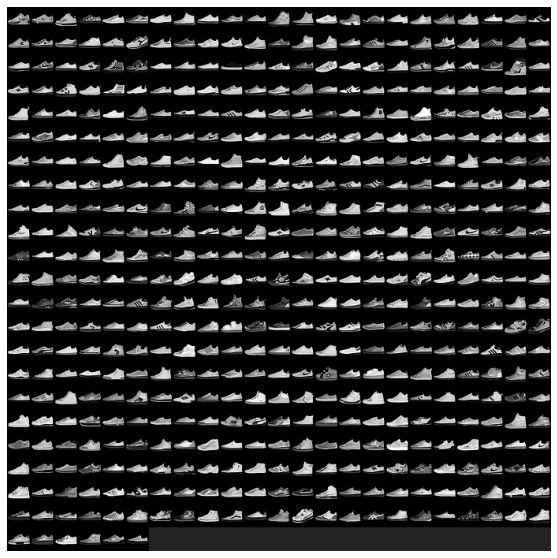

In [108]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy()) #makes the montage

In [109]:
x.shape #shapes the x values

torch.Size([512, 784])

In [110]:
Decoder(Encoder(x,w),w).shape

torch.Size([512, 784])

In [111]:
x2 = Autoencoder(x,w) #creating new variable 

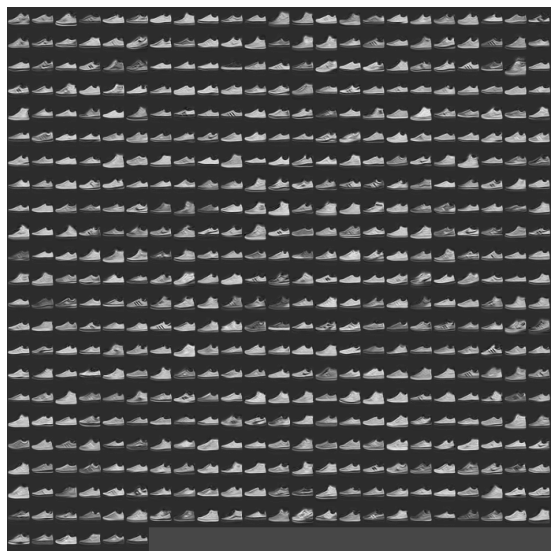

In [112]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #another montage but it is reshaped

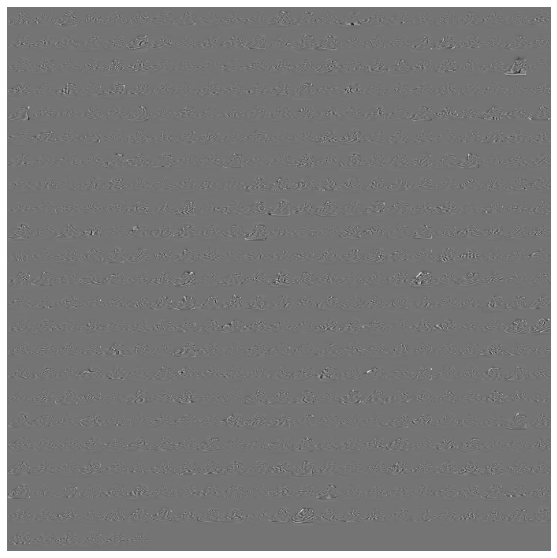

In [113]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy()) #another montage 

In [114]:
w[0].shape

torch.Size([784, 78])

In [115]:
wp = w[0].T #creating variable (Shortcut)

In [116]:
wp = wp.reshape(-1,28,28) #creating variable

In [117]:
wp.shape #getting the shape of the reshape

torch.Size([78, 28, 28])

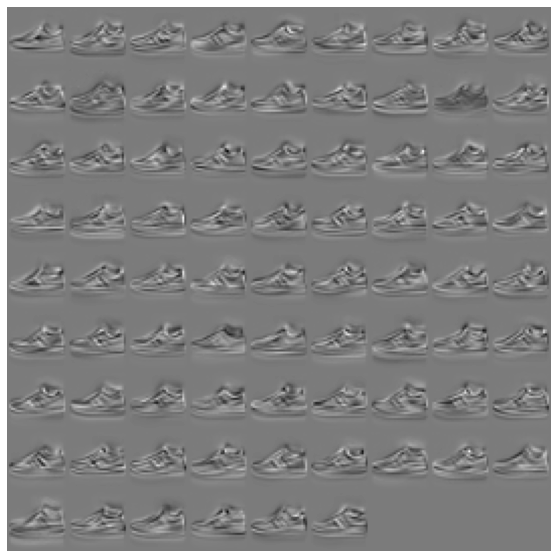

In [118]:
montage_plot(wp.detach().cpu().numpy()) #makes a montage of the new shape above

In [119]:
x.shape #getting the shape

torch.Size([512, 784])

In [120]:
x = x[0:1]

In [121]:
y = Encoder(x,w) #creating a shortcut

In [122]:
y.shape #shapes the new cvalue fro the encoder

torch.Size([1, 78])

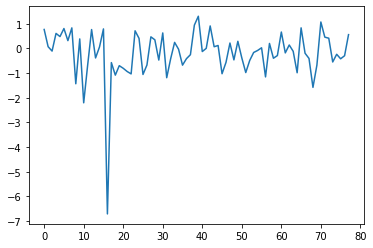

In [123]:
plt.plot(y[0].cpu().detach().numpy()) #plots the encoder

In [124]:
noise = 0.5*np.random.randn(78) #random points to just make the data have variety and a challenge

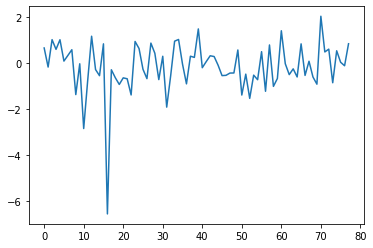

In [125]:
plt.plot(y[0].cpu().detach().numpy() + noise) #plots the encoder plus the random noise

In [126]:
noise #the points from the noise values

array([-0.09501931, -0.22817548,  1.14197845,  0.0041657 ,  0.5505659 ,
       -0.70452867,  0.03272018, -0.23559191,  0.07551362, -0.40094906,
       -0.63071729, -0.0850323 ,  0.41992906,  0.11827119, -0.59364591,
        0.06191582,  0.15398395,  0.2982714 ,  0.45944321, -0.21624963,
        0.17663748,  0.2678571 , -0.33962017,  0.24226655,  0.24236418,
        0.7997701 ,  0.00986447,  0.41577674,  0.09317181, -0.232439  ,
       -0.31536427, -0.71561931, -0.12140931,  0.72431375,  1.07548113,
        0.64880514, -0.47444766,  0.56719617, -0.68305106,  0.19819939,
       -0.05941943,  0.07640908, -0.57752371,  0.23173713, -0.19644106,
        0.49514885,  0.04675823, -0.6383782 ,  0.0485351 ,  0.29657513,
       -0.99215427,  0.51161696, -1.03395546, -0.34633734, -0.62591584,
        0.4855954 , -0.0586322 ,  0.60239497, -0.60090809, -0.36696768,
        0.75775701,  0.16673484, -0.6261887 , -0.118478  ,  0.39667178,
        0.01806212, -0.32715397,  0.50132227,  0.98897413, -0.22

In [127]:
noise = GPU(noise) 

In [128]:
x2 = Decoder(y+noise,w) #creating variable

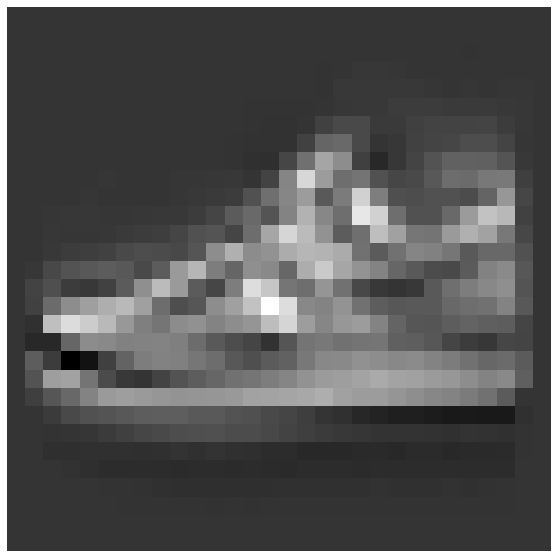

In [129]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #shape of the item in a section, not montage or string

In [130]:
x2 = Decoder(y,w) #creating variable for th decoder 

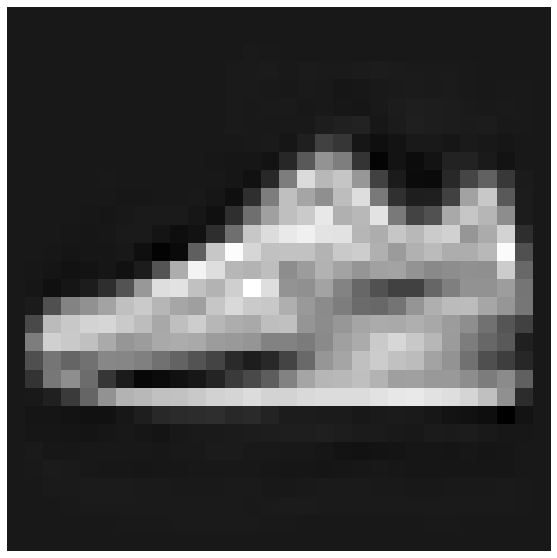

In [131]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) #section from the montage of the item 